# Goal


**Some business Objectives:**

- Retain customers
- Analyze relevant customer data
- Develop focused customer retention programs


## Instructions
1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
3. First look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case).
5. Change effective to date column to datetime format.
6. Check NaN values per column.
7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
9. Get categorical features.
10. What should we do with the customer_id column?

In [1]:
# 1. Import the necessary libraries.
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
import pandas as pd
import numpy as np
infile = 'we_fn_use_c_marketing_customer_value_analysis.csv'
customer_df = pd.read_csv(infile)
pd.set_option('display.max_columns', None)          # view all columns in jupyter
pd.set_option('display.max_rows', 150)                 # view max rows in jupyter

In [22]:
# 3. First look at its main features (head, shape, info).
# customer_df.head()
# customer_df.shape
# customer_df.info
customer_df.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [3]:
# 4. Rename the columns so they follow the PEP8 (snake case).
customer_df.columns = customer_df.columns.map(lambda x : x.replace("-", "_").replace(" ", "_").lower())
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# 10. What should we do with the customer_id column?
# Drop it (earlier in the process)
customer_df = customer_df.drop(['customer'], axis = 1)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# 5. Change effective to date column to datetime format.
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'].dtypes

dtype('<M8[ns]')

In [6]:
# 6. Check NaN values per column.
customer_df[customer_df.isna().any(axis=1)]   #or
customer_df.isnull().sum()/len(customer_df)

state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [7]:
customer_df['income'].nunique()

5694

In [8]:
# 7. Define a function that differentiates between continuous variables (by measuring) and 
# discrete variables (by counting). Hint: A number of unique values might be useful. 
# Store continuous data into a continuous data and do the same for discrete and categorical.
# This question is not very clear: what output is expected?
# assumption: customer_df split up in 3:
# df continuous  = customer_df_con
# df discrete    = customer_df_dis
# df categorical = customer_df_cat

def cat_types(cols):
    list_cols = customer_df.columns.tolist()
    for x in cols:
        thres = 10         # when classes/categories/discrete are expected
        type = customer_df[x].dtypes
        if type == 'object':
            cat_lst.append(x)
        elif type == 'datetime64[ns]' and customer_df[x].nunique() > thres:
            con_lst.append(x)
        elif type == 'int64' and customer_df[x].nunique() < thres:
            dis_lst.append(x)
        else:
            con_lst.append(x)     
    return con_lst, dis_lst, cat_lst

# Calling the function
con_lst = []
dis_lst = []
cat_lst = []
cat_types(customer_df)              # returns list with array of columns
customer_cat = customer_df[cat_lst]
customer_dis = customer_df[dis_lst]
customer_con = customer_df[con_lst]

display(customer_con.head(1))
display(customer_dis.head(1))
display(customer_cat.head(1))

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,384.811147


,number_of_open_complaints,number_of_policies
0,0,1


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize


In [9]:
# 8. For the categorical data, check if there is some kind of text in a variable so we would 
# need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, 
# decide what to do with the variables you get.
# a. visualize value counts
# b. draw conclusions and make decision
# c. clean

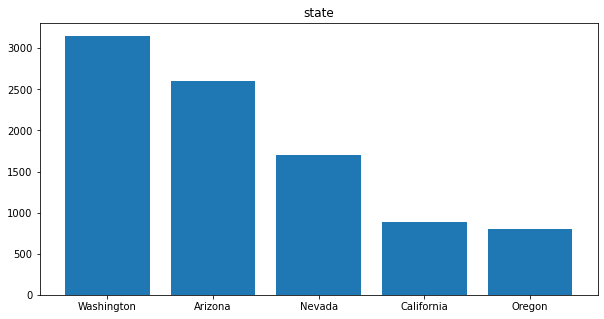

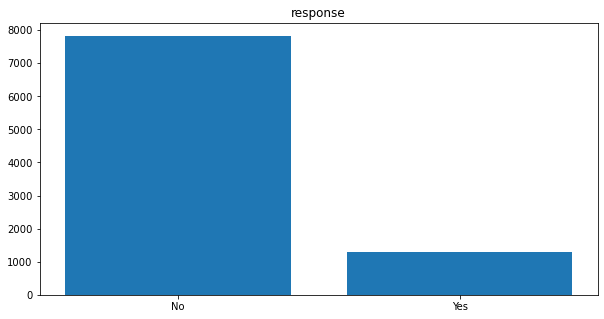

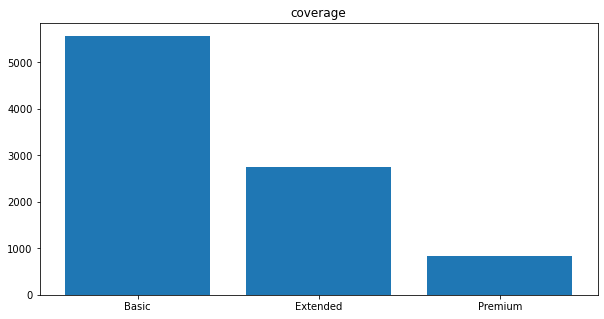

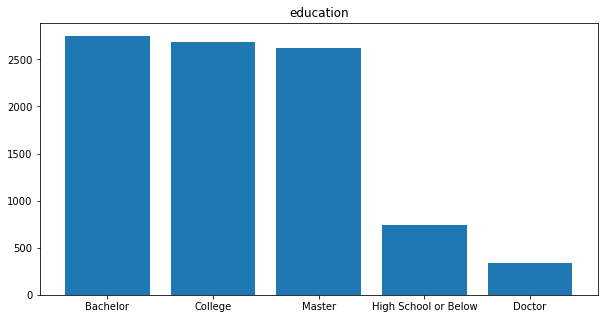

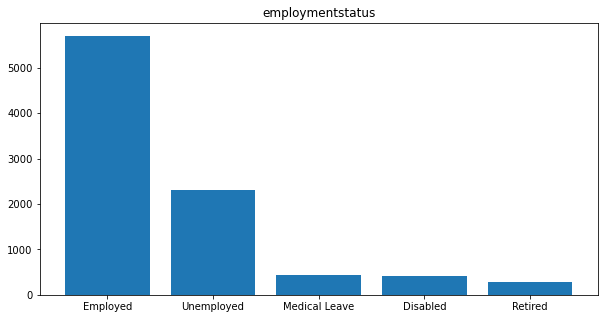

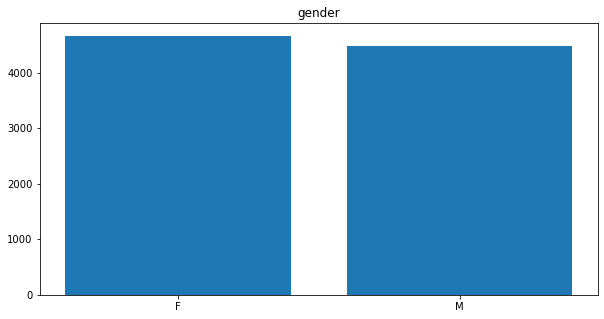

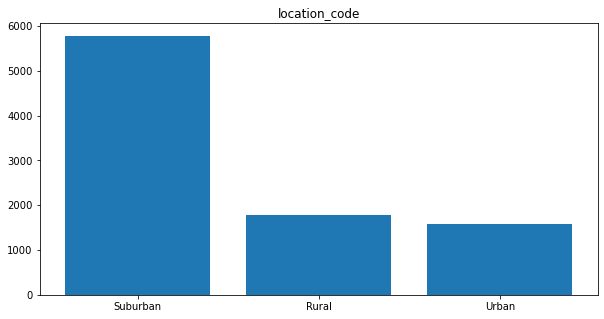

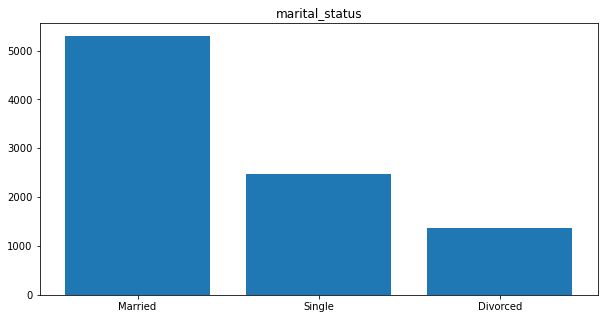

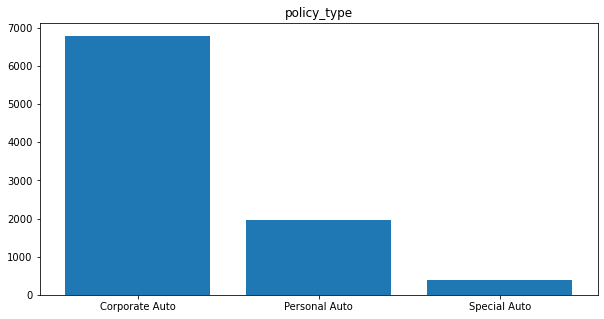

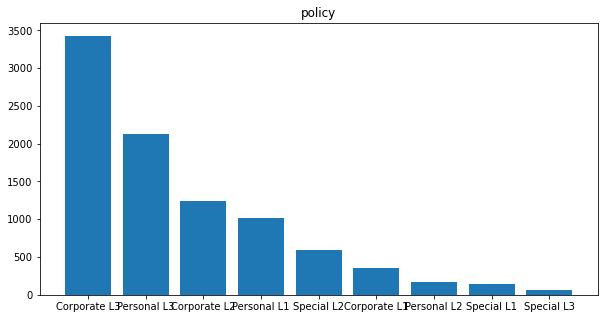

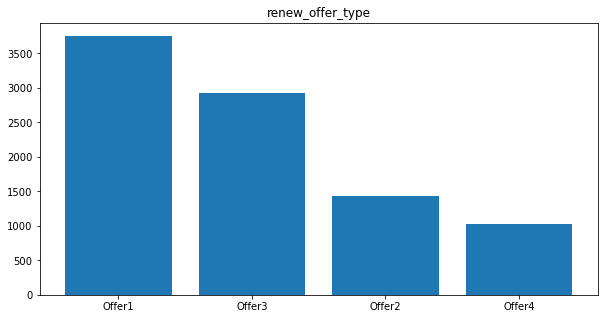

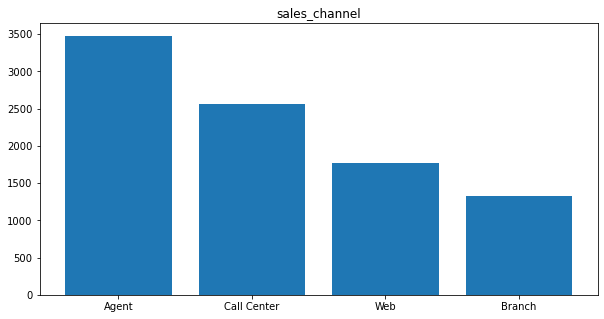

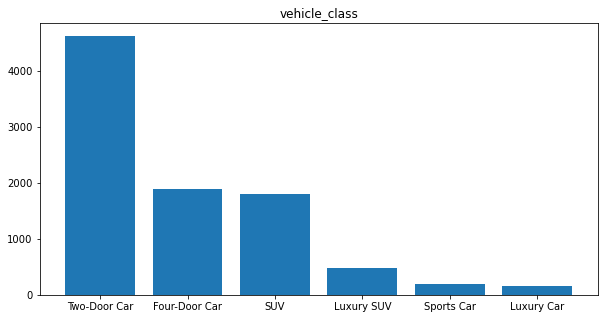

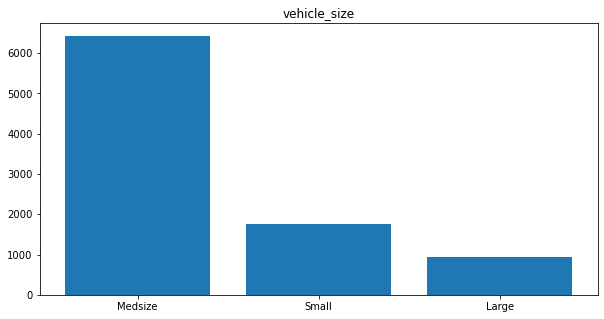

In [10]:
# a. visualize value counts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
for c in customer_cat:
    plt.figure(figsize=(10,5))
    plt.bar(customer_cat[c].unique(), customer_cat[c].value_counts())
    plt.title(c)
    plt.show();

In [11]:
# b. draw conclusions and make decision
# Education - merge last one with master as "master or higher"
# Employed - only this and non-working
# Suburban - non-suburban
# Married - non-married
# corporate Auto - non-corporate auto
# Policy: personal - non-personal
# vehicle class: combine last 3 into luxury

In [12]:
# c. clean
import warnings
warnings.filterwarnings("ignore")

# Education - merge last two into "master or higher"
def clean_education_col(x):
    if x in ['Doctor','Master']:
        return 'Master or Higher'
    else:
        return x

customer_cat['education'] = customer_cat['education'].apply(clean_education_col)

In [13]:
# c. clean

# employmentstatus - only this and non-working
def clean_employment_col(x):
    if x in ['Unemployed','Medical Leave','Disabled','Retired']:
        return 'Inactives'
    else:
        return x

customer_cat['employmentstatus'] = customer_cat['employmentstatus'].apply(clean_employment_col)

In [14]:
# c. clean

# Suburban - non-suburban
def clean_loc_code_col(x):
    if x in ['Rural','Urban']:
        return 'Non-suburban'
    else:
        return x

customer_cat['location_code'] = customer_cat['location_code'].apply(clean_loc_code_col)

In [15]:
# c. clean

# marital_status - Married - non-married
def clean_mer_status_col(x):
    if x in ['Single','Divorced']:
        return 'Not married'
    else:
        return x

customer_cat['marital_status'] = customer_cat['marital_status'].apply(clean_mer_status_col)

In [16]:
# c. clean

# Personal / corporate Auto special
def clean_policy_t_col(x):
    if x in ['Corporate Auto','Special Auto']:
        return 'Corporate/special'
    else:
        return x

customer_cat['policy_type'] = customer_cat['policy_type'].apply(clean_policy_t_col)

In [17]:
# c. clean

# Policy: personal - non-personal
def clean_policy_col(x):
    if x in ['Corporate L3','Corporate L2','Corporate L1','Special L3','Special L2','Special L1']:
        x = x.replace("Corporate","Non-personal")
        x = x.replace("Special","Non-personal")
        return x
    else:
        return x

customer_cat['policy'] = customer_cat['policy'].apply(clean_policy_col)

In [18]:
# c. clean

# vehicle class: combine last 3 into luxury
def clean_vehicle_c_col(x):
    if x in ['Sports Car','Luxury SUV','Luxury Car']:
        return 'Sports/luxury'
    else:
        return x

customer_cat['vehicle_class'] = customer_cat['vehicle_class'].apply(clean_vehicle_c_col)

In [19]:
customer_cat['policy'].value_counts()

Personal L3        3426
Personal L2        2122
Personal L1        1240
Non-personal L3    1162
Non-personal L2     759
Non-personal L1     425
Name: policy, dtype: int64

In [20]:
# 9. Get categorical features
# question is not clear: assumption: show cat features + 
customer_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate/special,Non-personal L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Inactives,F,Suburban,Not married,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Inactives,M,Suburban,Married,Corporate/special,Non-personal L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Non-suburban,Not married,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [21]:
for c in customer_cat:
    print(customer_cat[c].value_counts())
    print(' ')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
 
No     7826
Yes    1308
Name: response, dtype: int64
 
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
 
Bachelor                2748
College                 2681
High School or Below    2622
Master or Higher        1083
Name: education, dtype: int64
 
Employed     5698
Inactives    3436
Name: employmentstatus, dtype: int64
 
F    4658
M    4476
Name: gender, dtype: int64
 
Suburban        5779
Non-suburban    3355
Name: location_code, dtype: int64
 
Married        5298
Not married    3836
Name: marital_status, dtype: int64
 
Personal Auto        6788
Corporate/special    2346
Name: policy_type, dtype: int64
 
Personal L3        3426
Personal L2        2122
Personal L1        1240
Non-personal L3    1162
Non-personal L2     759
Non-personal L1     425
Name: policy, dtype: int64
 
Offer1    3752
Offer2    2926
Offer3    1432
Offer4   